In [1]:
import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from astropy import modeling

In [2]:
def readCSV(Filename):
    with open (Filename) as f:
        reader = csv.DictReader(f)
        Counts = [int(row['Counts']) for row in reader]
        Channels = list(range(1, len(Counts)+1))
        return Channels, Counts

In [328]:
def plot (X, Y):
    plt.plot(X, Y, linewidth=2)

def processPeak(Channels, Counts, PeaksX, Idx, RHeight):
    WidthsHalf, _, LeftIps ,RightIps = sp.signal.peak_widths(Counts, PeaksX, rel_height=RHeight)
    ForGaussX = Channels[int(LeftIps[Idx]) : int(RightIps[Idx])]
    ForGaussY = Counts[int(LeftIps[Idx]) : int(RightIps[Idx])]
    Xdata, Ydata = np.asarray([i for i in range (-len(ForGaussX)//2, len(ForGaussX)//2)]), np.asarray(ForGaussY)
    def Gauss(x, A, B): 
        return A*np.exp(-1*B*x**2)
    Params, Covariance = sp.optimize.curve_fit(Gauss, Xdata, Ydata) 
    FitA = Params[0] 
    FitB = Params[1] 
    N = 0
    while Gauss(N, FitA, FitB) > 1:
        N += 1
    FitY = Gauss(np.asarray([i for i in range (-N, N)]), FitA, FitB)
    X = [PeaksX[Idx] + i for i in range (-N, N)]
        
    plot(X, FitY)
    return max(FitY)

/tmp/ipykernel_31551/663378425.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


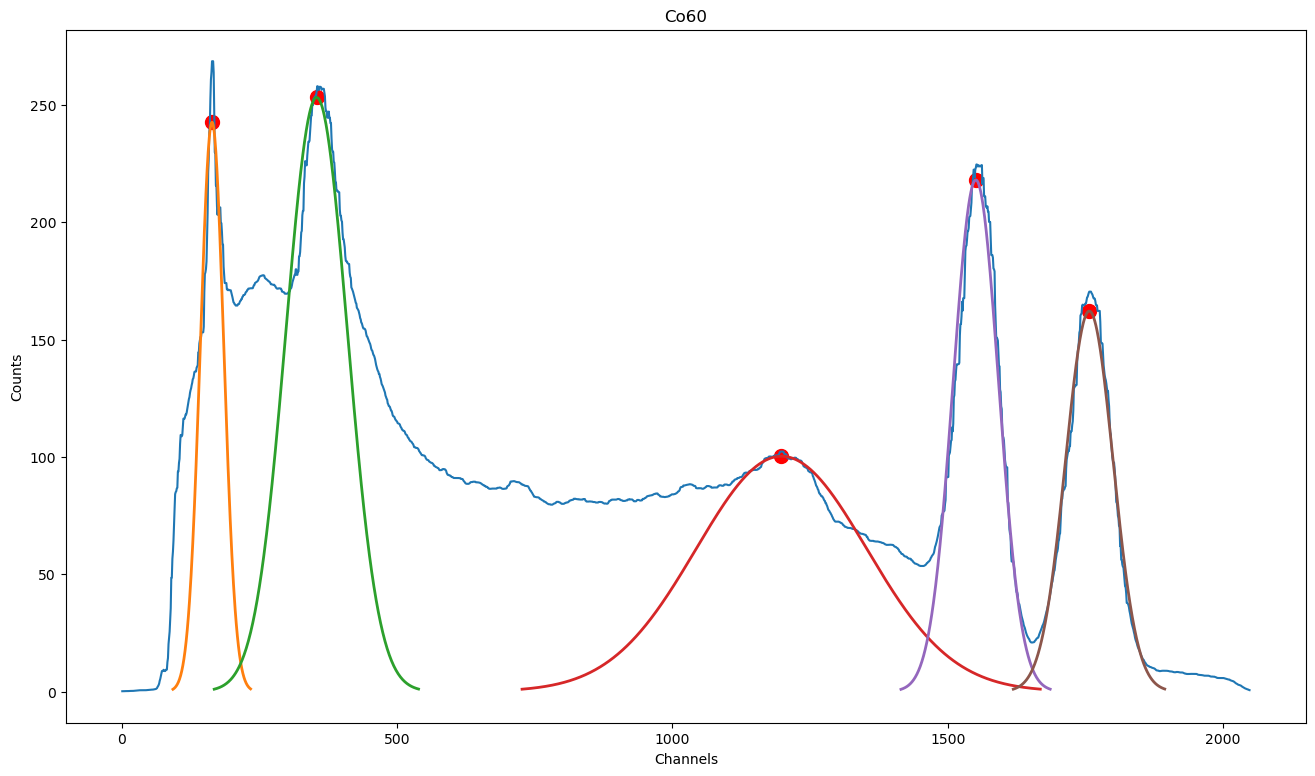

In [329]:
Channels, Counts = readCSV('co60.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)

plt.figure(figsize=[16, 9])
plt.title("Co60")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=20, width=30)
Maxes = []
Maxes.append(processPeak(Channels, Counts, PeaksX, 0, 0.33))
Maxes.append(processPeak(Channels,Counts, PeaksX,1, 0.9))
Maxes.append(processPeak(Channels,Counts, PeaksX,2, 0.5))
Maxes.append(processPeak(Channels,Counts, PeaksX,3, 0.9))
Maxes.append(processPeak(Channels,Counts, PeaksX,4, 1.0))
plt.scatter(PeaksX, Maxes, color='red', s=100)

[142]


/tmp/ipykernel_31551/663378425.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


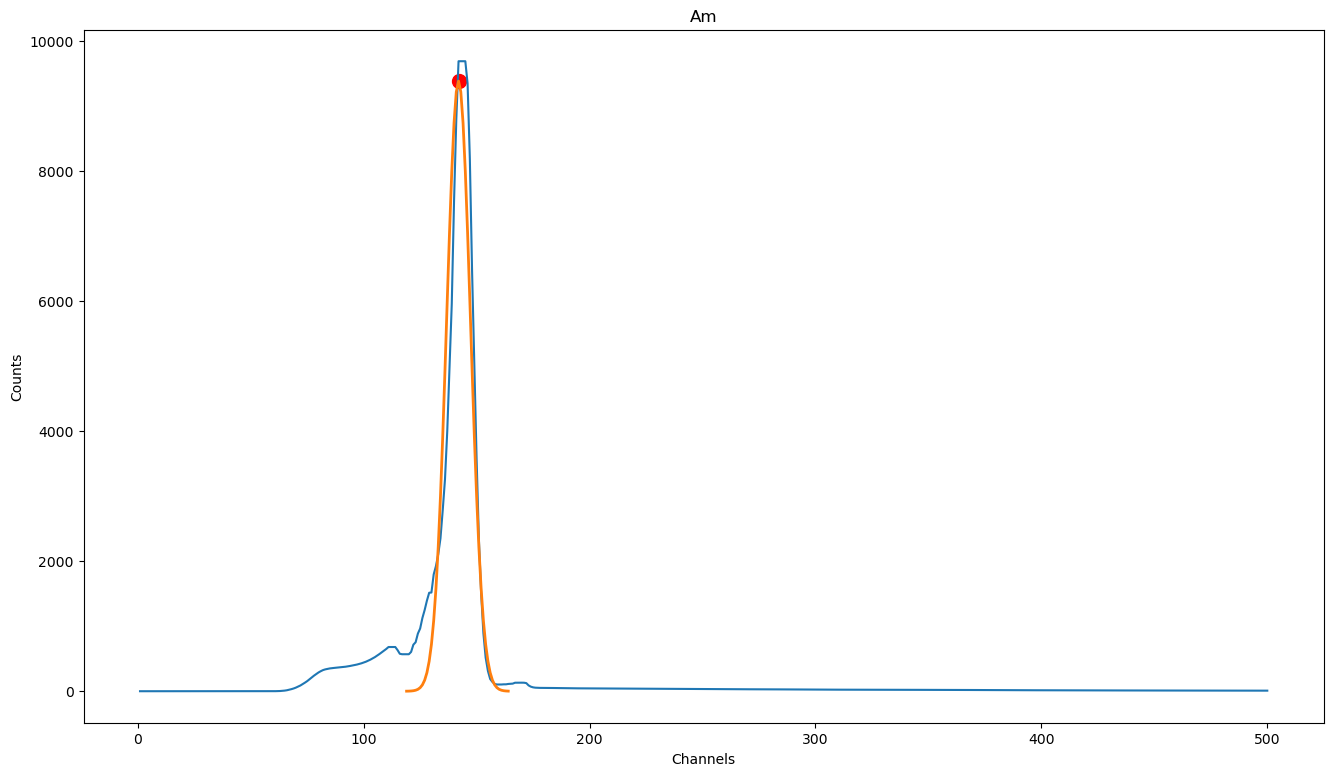

In [330]:
Channels, Counts = readCSV('Am.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
Channels, Counts= Channels[:500], Counts[:500]

plt.figure(figsize=[16, 9])
plt.title("Am")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=20, width=10)
print(PeaksX)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)

[ 99 161 321 614 911]


/tmp/ipykernel_31551/663378425.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


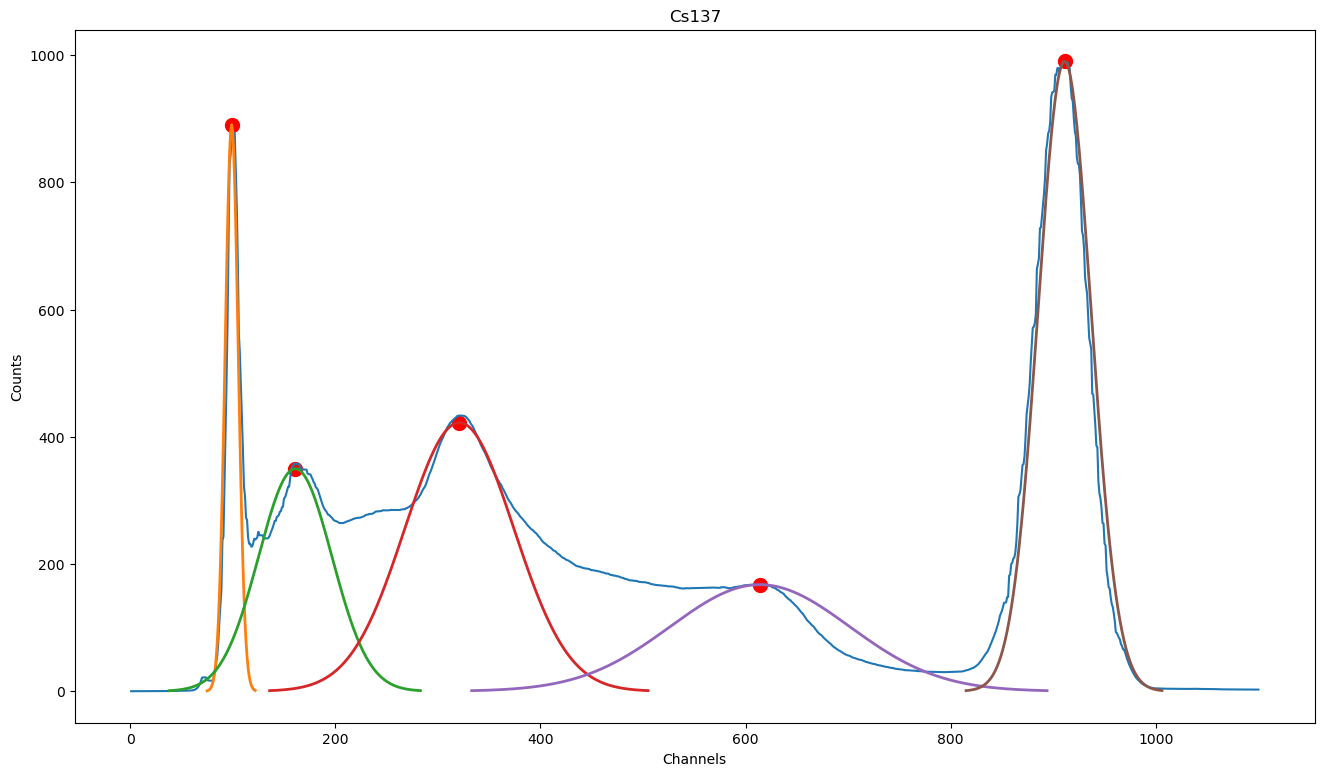

In [331]:
Channels, Counts = readCSV('cs137.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
Channels, Counts= Channels[:1100], Counts[:1100]

plt.figure(figsize=[16, 9])
plt.title("Cs137")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=5, width=10)
print(PeaksX)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.6))
Maxes.append(processPeak(Channels,Counts, PeaksX, 1, 0.95))
Maxes.append(processPeak(Channels,Counts, PeaksX, 2, 0.7))
Maxes.append(processPeak(Channels,Counts, PeaksX, 3, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 4, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)

[112 175 223 374 501]


/tmp/ipykernel_31551/663378425.py:10: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-1*B*x**2)


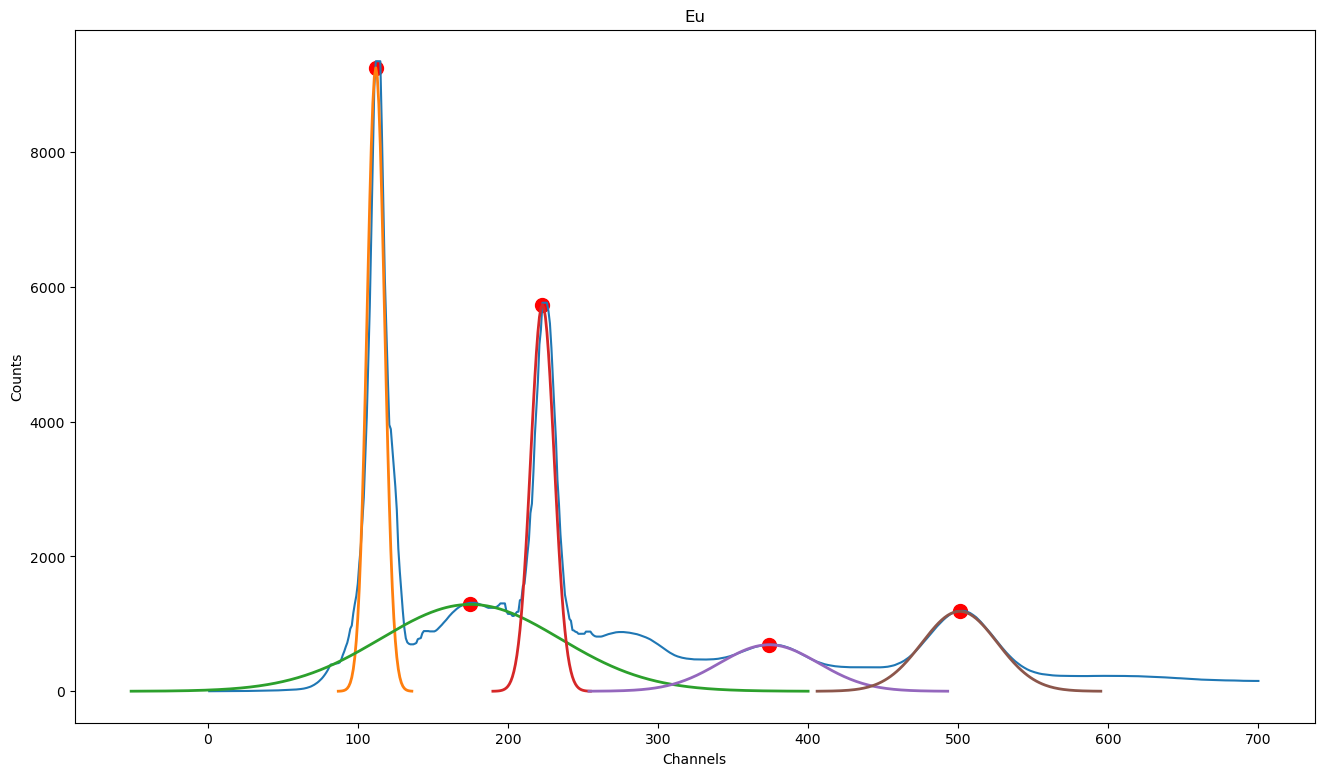

In [333]:
Channels, Counts = readCSV('Eu.csv')
Counts = sp.signal.medfilt(sp.signal.wiener(Counts, mysize=41), 7)
Channels, Counts= Channels[:700], Counts[:700]

plt.figure(figsize=[16, 9])
plt.title("Eu")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.plot(Channels, Counts)

PeaksX, _ = sp.signal.find_peaks(Counts, prominence=100, width=10)
print(PeaksX)
Maxes = []
Maxes.append(processPeak(Channels,Counts, PeaksX, 0, 0.6))
Maxes.append(processPeak(Channels,Counts, PeaksX, 1, 0.7))
Maxes.append(processPeak(Channels,Counts, PeaksX, 2, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 3, 0.8))
Maxes.append(processPeak(Channels,Counts, PeaksX, 4, 0.8))
plt.scatter(PeaksX, Maxes, color='red', s=100)